### Problem Statement

Continuing with the same scenario, now that you have been able to successfuly predict each student GPA, now you will classify each Student based on they probability to have a successful GPA score.

The different classes are:

- Low     : Students where final GPA is predicted to be between: 0 and 2
- Medium  : Students where final GPA is predicted to be between: 2 and 3.5
- High    : Students where final GPA is predicted to be between: 3.5 and 5



### 1) Import Libraries

First let's import the following libraries, if there is any library that you need and is not in the list bellow feel free to include it

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
import seaborn as sns


### 2) Load Data

- You will use the same file from the previous activity (Student Performance Data)

In [2]:
data = pd.read_csv('/content/Student_performance_data _.csv')
data

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


### 3) Add a new column called 'Profile' this column will have the following information

Based on the value of GPA for each student:

- If GPA values between 0 and 2 will be labeled 'Low',
- Values between 2 and 3.5 will be 'Medium',
- And values between 3.5 and 5 will be 'High'.


In [4]:
data['Profile'] = pd.cut(data['GPA'], bins=[0, 2, 3.5, 5], labels=['Low', 'Medium', 'High'], right=False)


In [5]:
data[data['Profile'] == 'High']

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,Profile
9,1010,16,1,0,1,18.444466,0,0,3,1,0,0,0,3.573474,0.0,High
44,1045,18,1,0,1,18.921512,1,1,3,1,1,0,0,4.000000,0.0,High
91,1092,18,1,0,2,7.724728,0,0,2,1,1,0,0,3.506920,0.0,High
92,1093,16,0,0,2,9.697175,1,1,3,0,0,0,0,3.552287,0.0,High
111,1112,17,1,3,0,5.670144,2,1,4,0,0,1,0,3.545159,0.0,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,3296,18,0,0,2,13.797920,2,1,3,0,0,0,0,3.597766,2.0,High
2319,3320,17,0,0,2,9.285447,0,0,4,1,0,1,1,4.000000,3.0,High
2326,3327,16,1,0,2,11.136888,4,0,4,1,1,0,0,3.546433,1.0,High
2338,3339,18,1,0,2,12.475444,1,1,2,1,0,1,0,3.572945,1.0,High


### 4) Use Matplotlib to show a Pie chart to show the percentage of students in each profile.
- Title: Students distribution of Profiles
- Graph Type: pie

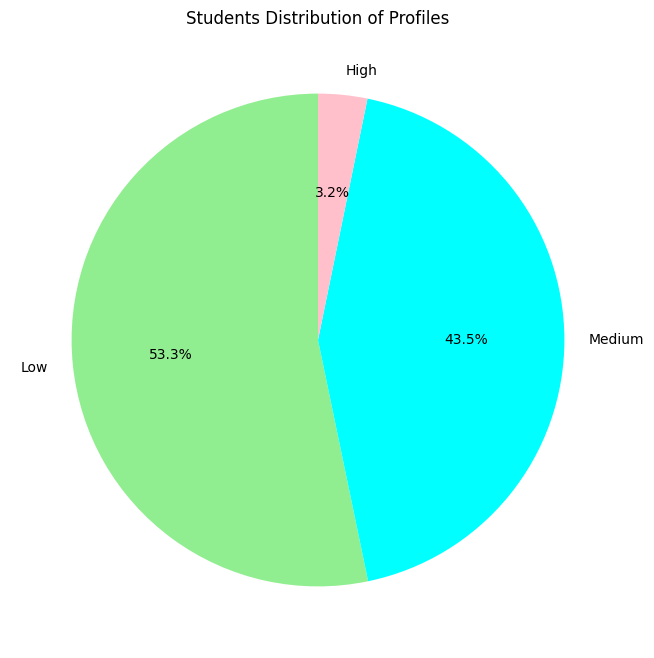

In [6]:
profile_counts = data['Profile'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(profile_counts, labels=profile_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen','cyan','pink'])
plt.title('Students Distribution of Profiles')
plt.show()


### 5) Convert the Profile column into a Categorical Int

You have already created a column with three different values: 'Low', 'Medium', 'High'. These are Categorical values. But, it is important to notice that Neural Networks works better with numbers, since we apply mathematical operations to them.

Next you need to convert Profile values from Low, Medium and High, to 0, 1 and 2. IMPORTANT, the order does not matter, but make sure you always assign the same number to Low, same number to Medium and same number to High.

Make sure to use the fit_transform method from LabelEncoder.

In [7]:
data['Profile'] = data['Profile'].map({'Low': 0, 'Medium': 1, 'High': 2})

### 6) Select the columns for your model.

Same as the last excersice we need a dataset for features and a dataset for label.

- Create the following dataset:
   - A dataset with the columns for the model.
   - From that data set generate the 'X' dataset. This dataset will have all the features (make sure Profile is NOT in this dataset)
   - Generate a second 'y' dataset, This dataset will only have our label column, which is 'Profile'.
   - Generate the Train and Test datasets for each X and y:
      - X_train with 80% of the data
      - X_test with 20% of the data
      - y_train with 80% of the data
      - y_test with 20% of the data

In [8]:
X = data.drop(columns = ['Profile'])
y = data['Profile']
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape

(1913, 15)

### 7) All Feature datasets in the same scale.

Use StandardScaler to make sure all features in the X_train and X_test datasets are on the same scale.


Standardization transforms your data so that it has a mean of 0 and a standard deviation of 1. This is important because many machine learning algorithms perform better when the input features are on a similar scale.

Reason for Using StandardScaler:
- Consistent Scale: Features with different scales (e.g., age in years, income in dollars) can bias the model. StandardScaler ensures all features contribute equally.
- Improved Convergence: Algorithms like gradient descent converge faster with standardized data.
- Regularization: Helps in achieving better performance in regularization methods like Ridge and Lasso regression.


In [9]:
 # Already done before

### 8. Define your Deep Neural Network.
- This will be a Sequential Neural Network.
- With a Dense input layer with 64 units, and input dimention based on the X_train size and Relu as the activation function.
- A Dense hidden layer with 32 units, and Relu as the activation function.
- And a Dense output layer with the number of different values in the y dataset, activation function = to sofmax

This last part of the output layer is super important, since we want to do a classification and not a regression, we will use activation functions that fits better a classification scenario.

In [10]:
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1], ), activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

### 9. Compile your Neural Network
- Choose Adam as the optimizer
- And sparse_categorical_crossentropy as the Loss function
- Also add the following metrics: accuracy

In [11]:
model.compile(optimizer = 'adam', loss ='sparse_categorical_crossentropy', metrics = ['accuracy'])

### 10. Fit (or train) your model
- Use the X_train and y_train datasets for the training
- Do 50 data iterations
- Choose the batch size = 10
- Also select a validation_split of 0.2
- Save the result of the fit function in a variable called 'history'

In [12]:
history = model.fit(X_train, y_train, batch_size = 10, epochs = 50, validation_split = 0.2)

Epoch 1/50
153/153 [==============================] - 1s 4ms/step - loss: 0.4742 - accuracy: 0.8516 - val_loss: 0.2500 - val_accuracy: 0.9243
Epoch 2/50
153/153 [==============================] - 0s 2ms/step - loss: 0.1987 - accuracy: 0.9412 - val_loss: 0.1706 - val_accuracy: 0.9504
Epoch 3/50
153/153 [==============================] - 0s 2ms/step - loss: 0.1366 - accuracy: 0.9575 - val_loss: 0.1224 - val_accuracy: 0.9556
Epoch 4/50
153/153 [==============================] - 0s 2ms/step - loss: 0.1008 - accuracy: 0.9667 - val_loss: 0.0968 - val_accuracy: 0.9765
Epoch 5/50
153/153 [==============================] - 0s 2ms/step - loss: 0.0770 - accuracy: 0.9778 - val_loss: 0.0819 - val_accuracy: 0.9765
Epoch 6/50
153/153 [==============================] - 0s 2ms/step - loss: 0.0620 - accuracy: 0.9817 - val_loss: 0.0947 - val_accuracy: 0.9634
Epoch 7/50
153/153 [==============================] - 0s 2ms/step - loss: 0.0552 - accuracy: 0.9863 - val_loss: 0.0668 - val_accuracy: 0.9843
Epoch 

### 11. View your history variable:
- Use Matplotlib.pyplot to show graphs of your model traning history
- In one graph:
   - Plot the Training Accuracy and the Validation Accuracy
   - X Label = Epochs
   - Y Label = Accuracy
   - Title = Model Accuracy over Epochs
- In a second graph:
   - Plot the Training Loss and the Validation Loss
   - X Label = Epochs
   - Y Label = Loss
   - Title = Model Loss over Epochs

In [13]:
X_epochs = np.arange(1,51)
y_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss_train = history.history['loss']
loss_val = history.history['val_loss']

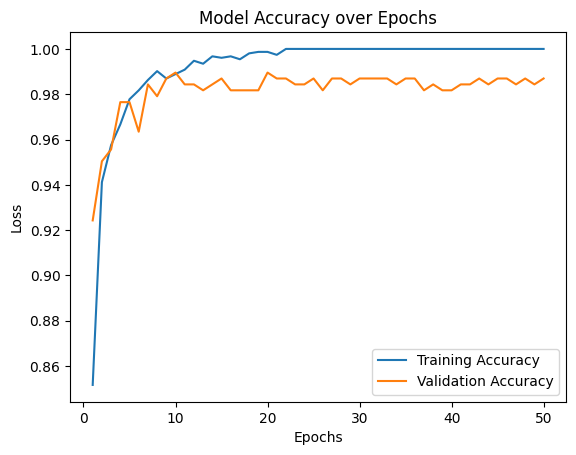

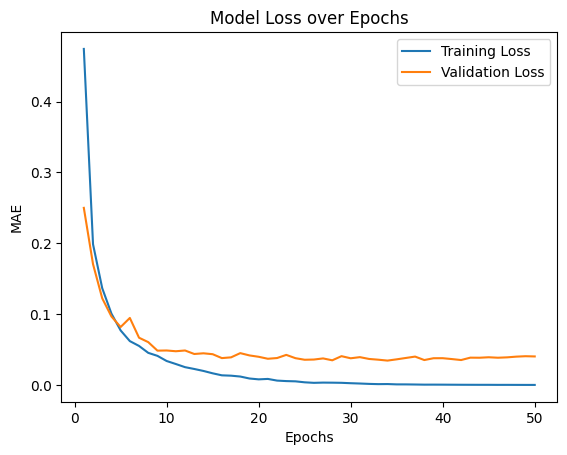

In [14]:
# Your code here
plt.plot(X_epochs, y_acc, label = 'Training Accuracy')
plt.plot(X_epochs, val_acc, label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Accuracy over Epochs')
plt.show()


plt.plot(X_epochs, loss_train, label = 'Training Loss')
plt.plot(X_epochs, loss_val, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.title('Model Loss over Epochs')
plt.show()

### 12. Evaluate your model:
- See the result of your loss function.
- What can you deduct from there?

In [15]:
results = model.evaluate(X_test, y_test, batch_size= 32)
results

15/15 [==============================] - 0s 1ms/step - loss: 0.0628 - accuracy: 0.9896


[0.06276265531778336, 0.9895615577697754]

In [16]:
history_1_loss = history.history['loss'][-1]
history_1_acc = history.history['accuracy'][-1]

As we can see, the loss function is low, which means the model is working adequately.

### 13. Use your model to make some predictions:
- Make predictions of your X_test dataset
- Print the each of the predictions and the actual value (which is in y_test)
- Replace the 'Low', 'Medium' and 'High' to your actual and predicted values.
- How good was your model?

In [19]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import accuracy_score
label_mapping = {0: 'Low', 1: 'Medium', 2: 'High'}
scc = SparseCategoricalCrossentropy()

y_pred = model.predict(X_test)
arg_max = y_pred.argmax(axis=-1)
for pred, actual in zip(y_pred, y_test):
    arg_max = pred.argmax(axis=-1)
    print(f"Valores predichos: {pred}, Valor actual: {label_mapping[actual]},       Etiqueta con la mayor probabilidad: {label_mapping[arg_max]}")
scc_entropy = scc(y_test, y_pred)
print(f"Sparse Categorical Cross-Entropy: {scc_entropy}")

15/15 [==============================] - 0s 1ms/step
Valores predichos: [9.9999994e-01 6.1057114e-12 3.9023531e-30], Valor actual: Low,       Etiqueta con la mayor probabilidad: Low
Valores predichos: [4.4614036e-13 9.9999994e-01 5.7875017e-08], Valor actual: Medium,       Etiqueta con la mayor probabilidad: Medium
Valores predichos: [3.9079068e-03 9.9609202e-01 4.3031682e-17], Valor actual: Medium,       Etiqueta con la mayor probabilidad: Medium
Valores predichos: [6.2933870e-13 1.1610942e-03 9.9883896e-01], Valor actual: High,       Etiqueta con la mayor probabilidad: High
Valores predichos: [9.9999994e-01 2.3922156e-28 0.0000000e+00], Valor actual: Low,       Etiqueta con la mayor probabilidad: Low
Valores predichos: [2.3887950e-10 9.9999994e-01 4.9022442e-11], Valor actual: Medium,       Etiqueta con la mayor probabilidad: Medium
Valores predichos: [1.6002319e-05 9.9998397e-01 3.3373244e-14], Valor actual: Medium,       Etiqueta con la mayor probabilidad: Medium
Valores predichos:

As we can see, the model assigned the highest probs to the correct labels most of the times and our loss function was very small, which means our model works perfectly fine.

#### Prediction of the first 5 students

In [20]:
y_1 = model.predict(X_test[:5])
y_1

1/1 [==============================] - 0s 24ms/step


array([[1.0000000e+00, 6.1057119e-12, 3.9023535e-30],
       [4.4614038e-13, 1.0000000e+00, 5.7875020e-08],
       [3.9079068e-03, 9.9609202e-01, 4.3031686e-17],
       [6.2933870e-13, 1.1610942e-03, 9.9883896e-01],
       [1.0000000e+00, 2.3922159e-28, 0.0000000e+00]], dtype=float32)

### 14. Compete against this model:
- Create two more different models to compete with this model
- Here are a few ideas of things you can change:
   - During Dataset data engineering:
      - You can remove features that you think do not help in the training and prediction
      - Feature Scaling: Ensure all features are on a similar scale (as you already did with StandardScaler)
   - During Model Definition:
      - You can change the Model Architecture (change the type or number of layers or the number of units)
      - You can add dropout layers to prevent overfitting
   - During Model Compile:
      - You can try other optimizer when compiling your model, here some optimizer samples: Adam, RMSprop, or Adagrad.
      - Try another Loss Function
   - During Model Training:
      - Encrease the number of Epochs
      - Adjust the size of your batch
- Explain in a Markdown cell which changes are you implementing
- Show the comparison of your model versus the original model
   
   


Modelo 2:
Cambios:

* Ingeniería de Datos del Dataset

Se eliminaron las columnas de Género, Etnicidad y ID de Estudiante.

* Definición del Modelo

Se cambió la arquitectura: la primera capa es la capa de entrada que recibe 64 unidades con activación relu, la segunda capa es una capa de dropout con un abandono de 0.3, la tercera capa agrega 32 unidades con activación relu, la cuarta capa es una capa de dropout con un abandono de 0.15, la quinta capa agrega 16 unidades con activación relu, la sexta capa es una capa de dropout con un abandono de 0.05 y la capa final es una capa de 3 unidades con activación softmax.

* Compilación del Modelo

No se realizaron cambios.

* Entrenamiento del Modelo

Se aumentó el número de épocas a 100 y se ajustó el tamaño de lote a 64.

Epoch 1/100
24/24 [==============================] - 1s 10ms/step - loss: 1.7794 - accuracy: 0.4634 - val_loss: 0.7453 - val_accuracy: 0.5901
Epoch 2/100
24/24 [==============================] - 0s 4ms/step - loss: 0.8424 - accuracy: 0.6379 - val_loss: 0.3758 - val_accuracy: 0.8642
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 0.5777 - accuracy: 0.7752 - val_loss: 0.3294 - val_accuracy: 0.8851
Epoch 4/100
24/24 [==============================] - 0s 4ms/step - loss: 0.4972 - accuracy: 0.8078 - val_loss: 0.3180 - val_accuracy: 0.8825
Epoch 5/100
24/24 [==============================] - 0s 4ms/step - loss: 0.4803 - accuracy: 0.8072 - val_loss: 0.2999 - val_accuracy: 0.8851
Epoch 6/100
24/24 [==============================] - 0s 4ms/step - loss: 0.4122 - accuracy: 0.8366 - val_loss: 0.2896 - val_accuracy: 0.8930
Epoch 7/100
24/24 [==============================] - 0s 4ms/step - loss: 0.4036 - accuracy: 0.8399 - val_loss: 0.2751 - val_accuracy: 0.8956
Epoch 8/100


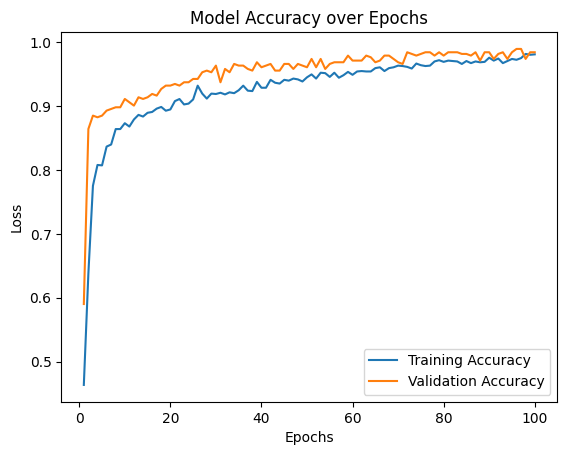

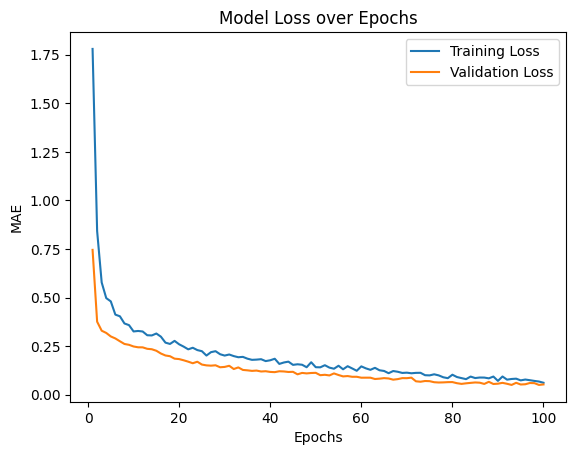

8/8 [==============================] - 0s 2ms/step - loss: 0.0575 - accuracy: 0.9833
Results:
 [0.057532668113708496, 0.9832985401153564]
15/15 [==============================] - 0s 1ms/step
Valores predichos: [9.9998409e-01 1.5818756e-05 2.8676694e-09], Valor actual: Low,       Etiqueta con la mayor probabilidad: Low
Valores predichos: [7.5298309e-04 9.9575037e-01 3.4967111e-03], Valor actual: Medium,       Etiqueta con la mayor probabilidad: Medium
Valores predichos: [2.4459367e-01 7.5508213e-01 3.2410069e-04], Valor actual: Medium,       Etiqueta con la mayor probabilidad: Medium
Valores predichos: [2.0182250e-05 1.3301886e-02 9.8667800e-01], Valor actual: High,       Etiqueta con la mayor probabilidad: High
Valores predichos: [9.9999994e-01 1.2472617e-12 7.8388398e-20], Valor actual: Low,       Etiqueta con la mayor probabilidad: Low
Valores predichos: [0.00183788 0.9965688  0.0015934 ], Valor actual: Medium,       Etiqueta con la mayor probabilidad: Medium
Valores predichos: [9.97

In [23]:
# Your code here
dataset = data.drop(columns = ['Gender', 'Ethnicity', 'StudentID'])

# Data preparation

X = dataset.drop(columns = 'Profile')
y = dataset['Profile']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape

# NN architecture
model_2 = Sequential()
model_2.add(Dense(64, input_shape=(X_train.shape[1], ), activation = 'relu'))
model_2.add(Dropout(0.3))
model_2.add(Dense(32, activation = 'relu'))
model_2.add(Dropout(0.15))
model_2.add(Dense(16, activation = 'relu'))
model_2.add(Dropout(0.05))
model_2.add(Dense(3, activation = 'softmax'))


# Model compilation

model_2.compile(optimizer = 'adam', loss ='sparse_categorical_crossentropy', metrics = ['accuracy'])

# Fitting the model

history_2 = model_2.fit(X_train, y_train, batch_size = 64, epochs = 100, validation_split = 0.2)

# Plotting the results
X_epochs = np.arange(1, 101)
y_acc = history_2.history['accuracy']
val_acc = history_2.history['val_accuracy']
loss_train = history_2.history['loss']
loss_val = history_2.history['val_loss']

plt.plot(X_epochs, y_acc, label = 'Training Accuracy')
plt.plot(X_epochs, val_acc, label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Accuracy over Epochs')
plt.show()


plt.plot(X_epochs, loss_train, label = 'Training Loss')
plt.plot(X_epochs, loss_val, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.title('Model Loss over Epochs')
plt.show()
# Model Evaluation

results = model_2.evaluate(X_test, y_test, batch_size= 64)
print('Results:\n',results)


# Predictions
y_pred_2 = model_2.predict(X_test)
for pred, actual in zip(y_pred_2, y_test):
    arg_max = pred.argmax(axis=-1)
    print(f"Valores predichos: {pred}, Valor actual: {label_mapping[actual]},       Etiqueta con la mayor probabilidad: {label_mapping[arg_max]}")
scc_entropy = scc(y_test, y_pred)
print(f"Sparse Categorical Cross-Entropy: {scc_entropy}")

#### Prediction of the first 5 students

In [24]:
y_2 = model_2.predict(X_test[:5])
y_2

1/1 [==============================] - 0s 23ms/step


array([[9.9998415e-01, 1.5818756e-05, 2.8676697e-09],
       [7.5298303e-04, 9.9575031e-01, 3.4967109e-03],
       [2.4459368e-01, 7.5508219e-01, 3.2410069e-04],
       [2.0182250e-05, 1.3301886e-02, 9.8667800e-01],
       [1.0000000e+00, 1.2472620e-12, 7.8388404e-20]], dtype=float32)

Modelo 3:
Cambios:

* Ingeniería de Datos del Dataset

Se eliminaron las columnas de Género, Etnicidad y ID de Estudiante.

* Definición del Modelo

Se cambió la arquitectura: primero, se inicia con la capa de entrada, que recibe datos con 64 unidades, seguida de Normalización por Lotes (Batch Normalization), y una capa de Dropout de 0.3. Luego, se agrega una capa oculta de 32 unidades, seguida de Normalización por Lotes y una capa de Dropout de 0.25. A continuación, se añade una capa oculta de 16 unidades con una capa de Dropout de 0.2. Luego se añade una capa adicional con 8 unidades y una capa de Dropout de 0.1. Finalmente, se añadió la capa de salida de 3 unidades con activación softmax.

* Compilación del Modelo

No se realizaron cambios.

* Entrenamiento del Modelo

Se aumentó el número de épocas a 150 y se ajustó el tamaño de lote a 16.

Epoch 1/150
96/96 [==============================] - 2s 5ms/step - loss: 0.7692 - accuracy: 0.6850 - val_loss: 0.5400 - val_accuracy: 0.8460
Epoch 2/150
96/96 [==============================] - 0s 3ms/step - loss: 0.4954 - accuracy: 0.8451 - val_loss: 0.3900 - val_accuracy: 0.8851
Epoch 3/150
96/96 [==============================] - 0s 3ms/step - loss: 0.4577 - accuracy: 0.8582 - val_loss: 0.3416 - val_accuracy: 0.9060
Epoch 4/150
96/96 [==============================] - 0s 3ms/step - loss: 0.4433 - accuracy: 0.8732 - val_loss: 0.3268 - val_accuracy: 0.9164
Epoch 5/150
96/96 [==============================] - 0s 3ms/step - loss: 0.4072 - accuracy: 0.8758 - val_loss: 0.2904 - val_accuracy: 0.9138
Epoch 6/150
96/96 [==============================] - 0s 3ms/step - loss: 0.3908 - accuracy: 0.8699 - val_loss: 0.2798 - val_accuracy: 0.9269
Epoch 7/150
96/96 [==============================] - 0s 3ms/step - loss: 0.3704 - accuracy: 0.8791 - val_loss: 0.2739 - val_accuracy: 0.9269
Epoch 8/150
9

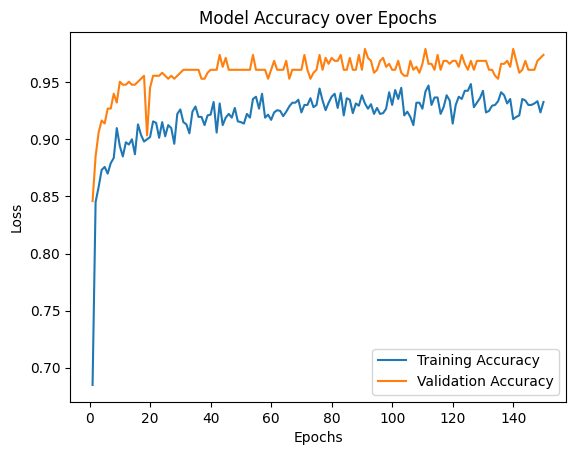

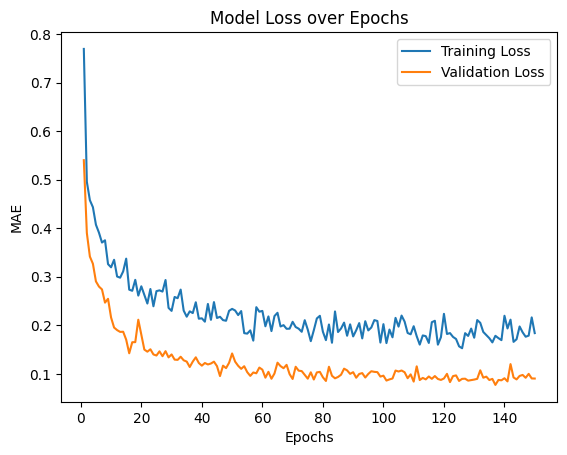

30/30 [==============================] - 0s 2ms/step - loss: 0.0881 - accuracy: 0.9708
Results:
 [0.0881476104259491, 0.9707724452018738]
15/15 [==============================] - 0s 2ms/step
Valores predichos: [9.9896216e-01 1.0377369e-03 3.0627085e-12], Valor actual: Low,       Etiqueta con la mayor probabilidad: Low
Valores predichos: [9.2322560e-05 9.3376815e-01 6.6139542e-02], Valor actual: Medium,       Etiqueta con la mayor probabilidad: Medium
Valores predichos: [7.8056693e-02 9.2152023e-01 4.2302936e-04], Valor actual: Medium,       Etiqueta con la mayor probabilidad: Medium
Valores predichos: [4.4700406e-07 5.6855655e-01 4.3144304e-01], Valor actual: High,       Etiqueta con la mayor probabilidad: Medium
Valores predichos: [9.9999994e-01 2.3708363e-08 1.1765808e-23], Valor actual: Low,       Etiqueta con la mayor probabilidad: Low
Valores predichos: [0.00123397 0.92592514 0.07284085], Valor actual: Medium,       Etiqueta con la mayor probabilidad: Medium
Valores predichos: [0.

In [26]:
dataset = data.drop(columns = ['Gender', 'Ethnicity', 'StudentID'])
from tensorflow.keras.layers import BatchNormalization
# Data preparation

X = dataset.drop(columns = 'Profile')
y = dataset['Profile']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape

# NN architecture
model_3 = Sequential()
model_3.add(Dense(64, input_shape=(X_train.shape[1],)))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.3))

model_3.add(Dense(32))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.25))

model_3.add(Dense(16))
model_3.add(Dropout(0.2))

model_3.add(Dense(8, activation='relu'))
model_3.add(Dropout(0.1))

model_3.add(Dense(3, activation='softmax'))

# Model compilation

model_3.compile(optimizer = 'adam', loss ='sparse_categorical_crossentropy', metrics = ['accuracy'])

# Fitting the model

history_3 = model_3.fit(X_train, y_train, batch_size = 16, epochs = 150, validation_split = 0.2)

# Plotting the results
X_epochs = np.arange(1, 151)
y_acc = history_3.history['accuracy']
val_acc = history_3.history['val_accuracy']
loss_train = history_3.history['loss']
loss_val = history_3.history['val_loss']
plt.plot(X_epochs, y_acc, label = 'Training Accuracy')
plt.plot(X_epochs, val_acc, label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Accuracy over Epochs')
plt.show()


plt.plot(X_epochs, loss_train, label = 'Training Loss')
plt.plot(X_epochs, loss_val, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.title('Model Loss over Epochs')
plt.show()

# Model Evaluation

results = model_3.evaluate(X_test, y_test, batch_size= 16)
print('Results:\n',results)

# Predictions
y_pred_3 = model_3.predict(X_test)
for pred, actual in zip(y_pred_3, y_test):
    arg_max = pred.argmax(axis=-1)
    print(f"Valores predichos: {pred}, Valor actual: {label_mapping[actual]},       Etiqueta con la mayor probabilidad: {label_mapping[arg_max]}")

scc_entropy = scc(y_test, y_pred_3)
print(f"Sparse Categorical Cross-Entropy: {scc_entropy}")


#### Prediction of the first 5 students

In [27]:
y_3 = model_3.predict(X_test[:5])
y_3

1/1 [==============================] - 0s 24ms/step


array([[9.9896228e-01, 1.0377370e-03, 3.0627089e-12],
       [9.2322560e-05, 9.3376815e-01, 6.6139542e-02],
       [7.8056693e-02, 9.2152023e-01, 4.2302936e-04],
       [4.4700408e-07, 5.6855655e-01, 4.3144304e-01],
       [1.0000000e+00, 2.3708365e-08, 1.1765808e-23]], dtype=float32)

# Comparing the models

In [28]:
data = {
    "Model": ["Model 1", "Model 2", "Model 3"],
    "Loss": [history_1_loss, history_2.history['loss'][-1], history_3.history['loss'][-1]],
    "Accuracy": [history_1_acc, history_2.history['accuracy'][-1], history_3.history['accuracy'][-1]]
}

df = pd.DataFrame(data)
df

,Model,Loss,Accuracy
0,Model 1,0.000189,1.000000
1,Model 2,0.061572,0.981046
2,Model 3,0.183892,0.932680


In [29]:
prob_1 = y_1.argmax(axis =-1)
prob_2 =  y_2.argmax(axis = -1)
prob_3 = y_3.argmax(axis = -1)

In [30]:
data = {
    "Student": ["1", "2", "3", "4", "5"],
    "Model 1": [prob_1[0], prob_1[1], prob_1[2], prob_1[3], prob_1[4]],
    "Model 2": [prob_2[0], prob_2[1], prob_2[2], prob_2[3], prob_2[4]],
    "Model 3": [prob_3[0], prob_3[1], prob_3[2], prob_3[3], prob_3[4]],
    "Actual value": [y_test.iloc[0], y_test.iloc[1], y_test.iloc[2], y_test.iloc[3], y_test.iloc[4]]
}

df = pd.DataFrame(data)

df

,Student,Model 1,Model 2,Model 3,Actual value
0,1,0,0,0,0
1,2,1,1,1,1
2,3,1,1,1,1
3,4,2,2,1,2
4,5,0,0,0,0



Como se observa en las tablas anteriores, el modelo que optimizó y minimizó la función de pérdida fue el Modelo 1. Además, obtuvo la función de pérdida con el valor más bajo y la mayor precisión.